In [76]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

In [77]:
#read in all csv data files
fertility_df    = pd.read_csv("Resources/Fertility.csv")
gdp_df          = pd.read_csv("Resources/GDP per capita.csv")
life_expec_df   = pd.read_csv("Resources/Life expectancy.csv")
happiness_df    = pd.read_csv("Resources/Happiness.csv")
meat_df         = pd.read_csv("Resources/Meat consumption.csv")
median_age_df   = pd.read_csv("Resources/Median age.csv")
pop_growth_df   = pd.read_csv("Resources/Population growth.csv")
sex_df          = pd.read_csv("Resources/Sex-ratio.csv")
suicide_df      = pd.read_csv("Resources/Suicide rate.csv")
urban_df        = pd.read_csv("Resources/Urbanization rate.csv")

In [78]:
#happiness data comes from different source, look at column names
happiness_df.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266


In [79]:
#Rename columns
gdp_df.rename(columns={"GDP per capita":"GDP Per Capita"},              inplace=True)
happiness_df.rename(columns={"Country name":"Country"},                 inplace=True)
happiness_df.rename(columns={'Ladder score': "Happiness Score"},        inplace=True)
happiness_df.rename(columns={'Regional indicator': "Region"},           inplace=True)
life_expec_df.rename(columns={"Life expectancy":"Life Expectancy"},     inplace=True)
meat_df.rename(columns={"Meat consumption":"Meat Consumption"},         inplace=True)
median_age_df.rename(columns={"Median age":"Median Age"},               inplace=True)
pop_growth_df.rename(columns={"Population growth":"Population Growth"}, inplace=True)
sex_df.rename(columns={"Sex-ratio":"Sex Ratio"},                        inplace=True)
suicide_df.rename(columns={"Suicide rate":"Suicide Rate"},              inplace=True)
urban_df.rename(columns={"Urbanization rate":"Urbanization Rate"},      inplace=True)

In [80]:
#are there duplicate records?
df_list = [fertility_df, gdp_df, life_expec_df, happiness_df, meat_df, median_age_df, pop_growth_df, sex_df, suicide_df, urban_df]

for x in df_list:
    for index, value in x['Country'].value_counts().items():
        if value > 1:
            print(f"Country {index} occurs {value} times in one csv.")

Country Russia occurs 2 times in one csv.
Country Guinea occurs 2 times in one csv.
Country Guinea occurs 2 times in one csv.
Country Guinea occurs 2 times in one csv.
Country Guinea occurs 2 times in one csv.
Country Guinea occurs 2 times in one csv.
Country Guinea occurs 2 times in one csv.
Country Guinea occurs 2 times in one csv.
Country Virgin Islands occurs 2 times in one csv.
Country Guinea occurs 2 times in one csv.
Country Guinea occurs 2 times in one csv.


In [81]:
#Only keep 1st duplicated record
gdp_df.drop_duplicates(subset=["Country","ISO-code"],        keep='first',inplace=True)
life_expec_df.drop_duplicates(subset=["Country","ISO-code"], keep='first',inplace=True)
meat_df.drop_duplicates(subset=["Country","ISO-code"],       keep='first',inplace=True)
median_age_df.drop_duplicates(subset=["Country","ISO-code"], keep='first',inplace=True)
pop_growth_df.drop_duplicates(subset=["Country","ISO-code"], keep='first',inplace=True)
sex_df.drop_duplicates(subset=["Country","ISO-code"],        keep='first',inplace=True)
suicide_df.drop_duplicates(subset=["Country","ISO-code"],    keep='first',inplace=True)
urban_df.drop_duplicates(subset=["Country","ISO-code"],      keep='first',inplace=True)
fertility_df.drop_duplicates(subset=["Country","ISO-code"],  keep='first',inplace=True)

In [82]:
#print lengths of all dataframes to find the one with the most records to be the basis of the join
print("Fertility", len(fertility_df))
print("GDP",       len(gdp_df))  
print("LiftExp",   len(life_expec_df))
print("Happiness", len(happiness_df))
print("Meat",      len(meat_df))     
print("Median",    len(median_age_df)) 
print("PopGrowth", len(pop_growth_df)) 
print("Sex",       len(sex_df))       
print("Suicide",   len(suicide_df))  
print("Urban",     len(urban_df)) 

Fertility 199
GDP 190
LiftExp 184
Happiness 153
Meat 186
Median 222
PopGrowth 206
Sex 224
Suicide 181
Urban 217


In [83]:
#merge data into one data frame--starting with all data from same source
merged_df = pd.merge(sex_df,fertility_df,  how="left",  on=["Country","ISO-code"])
merged_df = pd.merge(merged_df,gdp_df,  how="left", on=["Country","ISO-code"])
merged_df = pd.merge(merged_df,life_expec_df,  how="left", on=["Country","ISO-code"])
merged_df = pd.merge(merged_df,meat_df,  how="left", on=["Country", "ISO-code"])
merged_df = pd.merge(merged_df,median_age_df,  how="left", on=["Country","ISO-code"])
merged_df = pd.merge(merged_df,pop_growth_df,  how="left", on=["Country","ISO-code"])
merged_df = pd.merge(merged_df,suicide_df,  how="left", on=["Country","ISO-code"])
merged_df = pd.merge(merged_df,urban_df,  how="left", on=["Country","ISO-code"])

In [84]:
#add in happiness data
merged_df = pd.merge(merged_df,happiness_df,  how="left", on=["Country"])
merged_df.drop(columns=["Standard error of ladder score",
                         "upperwhisker", 
                         "lowerwhisker",
                         "Logged GDP per capita",
                         "Social support",
                         "Healthy life expectancy",
                         "Freedom to make life choices",
                         "Generosity",
                         "Perceptions of corruption",
                         "Ladder score in Dystopia",
                         "Explained by: Log GDP per capita",
                         "Explained by: Social support",
                         "Explained by: Healthy life expectancy",
                         "Explained by: Freedom to make life choices",
                         "Explained by: Generosity",
                         "Explained by: Perceptions of corruption",
                         "Dystopia + residual"],axis=1,inplace=True)

In [85]:
merged_df.head()

,Country,Sex Ratio,ISO-code,Fertility,GDP Per Capita,Life Expectancy,Meat Consumption,Median Age,Population Growth,Suicide Rate,Urbanization Rate,Region,Happiness Score
0,Afghanistan,1.03,AFG,4.5,2182.0,64.5,17.3,27.4,2.41,6.4,26.0,South Asia,2.5669
1,Albania,0.98,ALB,1.6,14866.0,NaN,NaN,32.9,0.26,5.6,62.1,Central and Eastern Europe,4.8827
2,Algeria,1.03,DZA,3.0,16091.0,76.7,18.3,28.1,1.89,3.3,73.7,Middle East and North Africa,5.0051
3,American Samoa,1.00,ASM,NaN,NaN,NaN,24.9,25.5,-0.26,NaN,87.2,NaN,NaN
4,Andorra,1.06,AND,1.3,NaN,81.8,NaN,44.3,0.63,NaN,87.9,NaN,NaN


In [86]:
#How many countries are listed, same as the number of rows of data
merged_df["Country"].count()

224

In [87]:
#check all numbers are integer/float types for plotting
merged_df.dtypes

Country               object
Sex Ratio            float64
ISO-code              object
Fertility            float64
GDP Per Capita       float64
Life Expectancy      float64
Meat Consumption     float64
Median Age           float64
Population Growth    float64
Suicide Rate         float64
Urbanization Rate    float64
Region                object
Happiness Score      float64
dtype: object

In [88]:
#check for any unusual min/max data points
merged_df.describe()

,Sex Ratio,Fertility,GDP Per Capita,Life Expectancy,Meat Consumption,Median Age,Population Growth,Suicide Rate,Urbanization Rate,Happiness Score
count,224.000000,199.000000,190.000000,183.000000,182.000000,221.000000,205.000000,181.000000,215.000000,143.000000
mean,1.006339,2.646834,22687.718421,72.215027,45.446703,30.833032,1.369171,9.731492,61.594419,5.491626
std,0.204154,1.227961,22687.027969,7.478398,34.959013,8.850380,1.267994,5.535447,23.898130,1.132267
min,0.830000,1.100000,314.500000,52.800000,3.000000,15.400000,-1.600000,0.400000,9.100000,2.566900
25%,0.950000,1.700000,5303.000000,67.000000,15.325000,23.100000,0.450000,5.800000,42.800000,4.726700
50%,0.985000,2.200000,14991.500000,73.400000,34.950000,30.300000,1.240000,9.100000,62.600000,5.541500
75%,1.010000,3.550000,33642.750000,77.250000,70.600000,38.700000,2.170000,12.800000,81.200000,6.243050
max,3.390000,6.100000,113352.000000,84.700000,145.900000,53.100000,9.130000,30.200000,100.000000,7.808700


In [89]:
#examine relationships between all metrics
merged_df.corr()

,Sex Ratio,Fertility,GDP Per Capita,Life Expectancy,Meat Consumption,Median Age,Population Growth,Suicide Rate,Urbanization Rate,Happiness Score
Sex Ratio,1.000000,-0.043403,0.175163,0.049815,0.116298,-0.045665,0.401431,-0.190586,0.128364,0.089650
Fertility,-0.043403,1.000000,-0.620067,-0.847344,-0.598771,-0.862931,0.624794,0.119895,-0.539265,-0.661711
GDP Per Capita,0.175163,-0.620067,1.000000,0.700664,0.714644,0.677047,-0.229931,-0.035751,0.629508,0.745166
Life Expectancy,0.049815,-0.847344,0.700664,1.000000,0.685394,0.823798,-0.521284,-0.287560,0.592238,0.771523
Meat Consumption,0.116298,-0.598771,0.714644,0.685394,1.000000,0.659112,-0.349692,-0.098811,0.534874,0.744284
Median Age,-0.045665,-0.862931,0.677047,0.823798,0.659112,1.000000,-0.665013,0.017984,0.492915,0.679637
Population Growth,0.401431,0.624794,-0.229931,-0.521284,-0.349692,-0.665013,1.000000,-0.138674,-0.252989,-0.462585
Suicide Rate,-0.190586,0.119895,-0.035751,-0.287560,-0.098811,0.017984,-0.138674,1.000000,-0.049334,-0.066812
Urbanization Rate,0.128364,-0.539265,0.629508,0.592238,0.534874,0.492915,-0.252989,-0.049334,1.000000,0.676126
Happiness Score,0.089650,-0.661711,0.745166,0.771523,0.744284,0.679637,-0.462585,-0.066812,0.676126,1.000000


In [90]:
#drop columns that we aren't using for analysis
merged_df_small = merged_df[["Country", 'ISO-code','Region', 'Fertility','GDP Per Capita','Life Expectancy','Meat Consumption','Urbanization Rate','Happiness Score']]
merged_df_small.head()                             

,Country,ISO-code,Region,Fertility,GDP Per Capita,Life Expectancy,Meat Consumption,Urbanization Rate,Happiness Score
0,Afghanistan,AFG,South Asia,4.5,2182.0,64.5,17.3,26.0,2.5669
1,Albania,ALB,Central and Eastern Europe,1.6,14866.0,NaN,NaN,62.1,4.8827
2,Algeria,DZA,Middle East and North Africa,3.0,16091.0,76.7,18.3,73.7,5.0051
3,American Samoa,ASM,NaN,NaN,NaN,NaN,24.9,87.2,NaN
4,Andorra,AND,NaN,1.3,NaN,81.8,NaN,87.9,NaN


In [91]:
#identify how much data is missing for each column, want to have full for meat consumption
print(merged_df_small.isna().sum())

Country               0
ISO-code              1
Region               81
Fertility            25
GDP Per Capita       34
Life Expectancy      41
Meat Consumption     42
Urbanization Rate     9
Happiness Score      81
dtype: int64


In [92]:
#dropping records that are nan for meat consumption
nan_records = merged_df_small.loc[merged_df_small["Meat Consumption"].isna()]
nan_record_list = list(nan_records["Country"])

noblanksmeat_df = merged_df_small.loc[~merged_df_small["Country"].isin(nan_record_list)]

print(noblanksmeat_df.isna().sum())

Country               0
ISO-code              0
Region               42
Fertility             5
GDP Per Capita        9
Life Expectancy      11
Meat Consumption      0
Urbanization Rate     4
Happiness Score      42
dtype: int64


In [93]:
print(f'The following {len(nan_record_list)} countries were removed from analysis for lack of data on Meat Consumption {nan_record_list}.')

The following 42 countries were removed from analysis for lack of data on Meat Consumption ['Albania', 'Andorra', 'Anguilla', 'Aruba', 'Bermuda', 'Brunei', 'Cayman Islands', 'Cook Islands', 'Curacao', 'Equatorial Guinea', 'Eswatini', 'Faroe Islands', 'Gaza Strip', 'Gibraltar', 'Guernsey', 'Hong Kong', 'Isle of Man', 'Jersey', 'Liechtenstein', 'Macau', 'Marshall Islands', 'Micronesia', 'Monaco', 'Montenegro', 'Montserrat', 'Nauru', 'Northern Mariana Islands', 'Palau', 'Puerto Rico', 'Saint Barthelemy', 'Saint Helena, Ascension and Tristan da Cunha', 'Saint Martin', 'Saint Pierre and Miquelon', 'San Marino', 'Serbia', 'Sint Maarten', 'Taiwan', 'Tonga', 'Turks and Caicos Islands', 'Tuvalu', 'Wallis and Futuna', 'Western Sahara'].


## Meat consumption vs Happiness Score

In [94]:
# New Clean DataFrame
happiness_df = noblanksmeat_df[["Country", "Region", "Meat Consumption", "Happiness Score"]]

#which countries were dropped?
blank_happiness = happiness_df.loc[happiness_df["Happiness Score"].isna()]
blank_happiness_list = list(blank_happiness["Country"])
print(f'The following {len(blank_happiness_list)} countries were removed from analysis for lack of data on Happiness Score {blank_happiness_list}')

#drop urbanization rate values that are nan
clean_happy_df = happiness_df.dropna(subset=["Happiness Score"])

The following 42 countries were removed from analysis for lack of data on Happiness Score ['American Samoa', 'Angola', 'Antigua and Barbuda', 'The Bahamas', 'Barbados', 'Belize', 'Bhutan', 'Cape Verde', 'Democratic Republic of the Congo', 'Republic of the Congo', 'Cuba', 'Djibouti', 'Dominica', 'Eritrea', 'Fiji', 'French Polynesia', 'The Gambia', 'Greenland', 'Grenada', 'Guam', 'Guyana', 'Kiribati', 'North Korea', 'New Caledonia', 'North Macedonia', 'Oman', 'Papua New Guinea', 'Qatar', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'Samoa', 'Sao Tome and Principe', 'Seychelles', 'Solomon Islands', 'Somalia', 'Sudan', 'Suriname', 'Syria', 'East Timor', 'Vanuatu', 'Virgin Islands']


Quartiles, Outliers and Boxplots

In [95]:
# Quartiles and qutliers
quartiles = clean_happy_df["Happiness Score"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of happiness score is: {lowerq}")
print(f"The upper quartile of happiness score is: {upperq}")
print(f"The interquartile range of happiness score is: {iqr}")
print(f"The the median of happiness score is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of happiness score is: 4.7122750282500006
The upper quartile of happiness score is: 6.263349891000001
The interquartile range of happiness score is: 1.5510748627500002
The the median of happiness score is: 5.5406999589999995 
Values below 2.3856627341250003 could be outliers.
Values above 8.589962185125001 could be outliers.


Text(0, 0.5, 'Happiness Score')

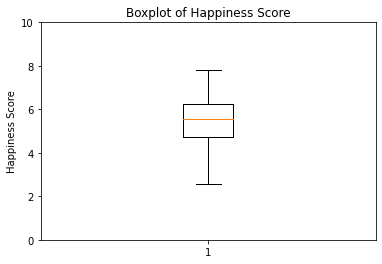

In [96]:
# Boxplot spread of happiness score data
plt.boxplot(clean_happy_df["Happiness Score"])
plt.title("Boxplot of Happiness Score")
plt.ylim(0,10)
plt.ylabel("Happiness Score")

Correlation and Regression

The correlation coefficient for world meat consumption and happiness score is 0.7442837934178907.


Text(0.5, 1.0, 'Meat Consumption vs. Happiness Score in the World with Regression Line')

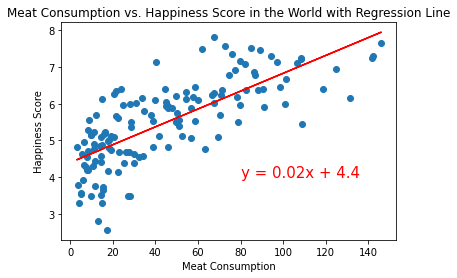

In [97]:
# Calculate the correlation coefficient and linear regression model 
x = clean_happy_df['Meat Consumption']
y = clean_happy_df['Happiness Score']
# Correlation coefficient
correlation = st.pearsonr(x,y)
print(f'The correlation coefficient for world meat consumption and happiness score is {correlation[0]}.')

# Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(80,4),fontsize=15,color="red")

plt.xlabel("Meat Consumption")
plt.ylabel("Happiness Score")
plt.title('Meat Consumption vs. Happiness Score in the World with Regression Line')

Bar Chart

In [98]:
# Get New DataFrame Groupby Regional Indicator
meat = clean_happy_df.groupby(['Region']).mean()["Meat Consumption"]
happiness = clean_happy_df.groupby(['Region']).mean()["Happiness Score"]
region_df = meat.to_frame().join(happiness).rename(columns={'Meat Consumption':'Average Meat consumption',
                                                            'Happiness Score':'Average Happiness Score'})
region_df

,Average Meat consumption,Average Happiness Score
Region,,
Central and Eastern Europe,64.108333,6.027742
Commonwealth of Independent States,32.425000,5.358342
East Asia,63.775000,5.580825
Latin America and Caribbean,48.733333,5.981786
Middle East and North Africa,39.418750,5.269306
North America and ANZ,120.800000,7.173525
South Asia,10.157143,4.475443
Southeast Asia,28.611111,5.383367
Sub-Saharan Africa,15.711429,4.354063


Text(0.5, 1.0, 'Average Happiness Score for Different Regions')

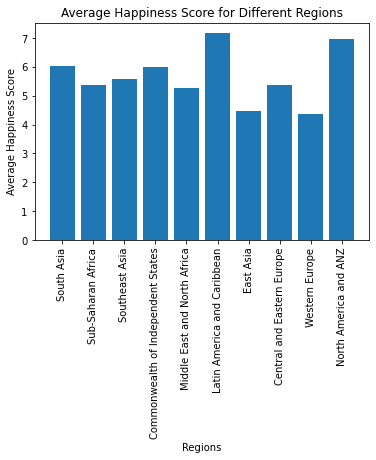

In [99]:
# Generate a bar plot showing the average happiness score for different regions using pyplot.
x_axis = region_df.sort_values(by="Average Meat consumption").index.values
plt.bar(x_axis, region_df['Average Happiness Score'])                
plt.xticks(rotation=90)

# Set labels for axes
plt.xlabel("Regions")
plt.ylabel("Average Happiness Score")
plt.title('Average Happiness Score for Different Regions')

## Meat consumption vs. Urbanization Rate

In [100]:
#meat consumption vs urbanization rate
urban_data_df = noblanksmeat_df[["Country", "Region", "Meat Consumption", "Urbanization Rate"]]

#which countries were dropped?
blank_urban = urban_data_df.loc[urban_data_df["Urbanization Rate"].isna()]
blank_urban_list = list(blank_urban["Country"])
print(f'The following {len(blank_urban_list)} countries were removed from analysis for lack of data on Urbanization rate {blank_urban_list}')

#drop urbanization rate values that are nan
urban_data_df_nona = urban_data_df.dropna(subset=["Urbanization Rate"])

The following 4 countries were removed from analysis for lack of data on Urbanization rate ['Kuwait', 'Samoa', 'Sao Tome and Principe', 'Virgin Islands']


In [101]:
#set meat consump. and urbanization columns to variables for plotting
meat_only = urban_data_df_nona["Meat Consumption"]
urban_only = urban_data_df_nona["Urbanization Rate"]

Urbanization rate boxplot

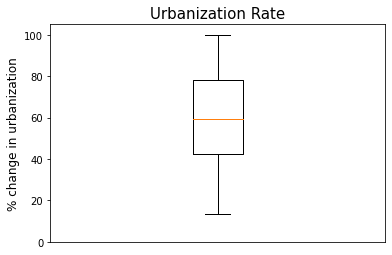

In [102]:
#show boxplot spread of urbanization rate data
plt.boxplot(urban_only)
plt.title("Urbanization Rate", fontsize =15)
plt.ylim(0,105)
plt.ylabel("% change in urbanization", fontsize=12)
plt.xticks([np.nan])

plt.savefig("Output/urbanization_boxplot.png")

In [103]:
#quartile calcuations for urbanization rate
quartiles = urban_only.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of urbanization rate is: {lowerq}")
print(f"The upper quartile of urbanization rate is: {upperq}")
print(f"The interquartile range of urbanization rate is: {iqr}")
print(f"The the median of urbanization rate is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of urbanization rate is: 42.425
The upper quartile of urbanization rate is: 78.25
The interquartile range of urbanization rate is: 35.825
The the median of urbanization rate is: 59.25 
Values below -11.312500000000007 could be outliers.
Values above 131.9875 could be outliers.


Urabanizaion rate scatter plot

The r value is: 0.53487
The r-squared value is: 0.28609


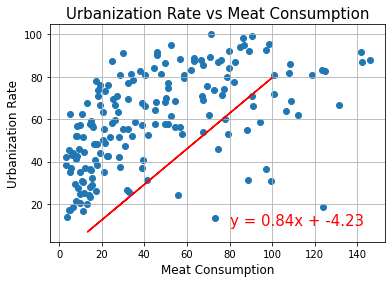

In [104]:
#scatter plot for meat vs urbanzation
plt.scatter(meat_only, urban_only)
plt.grid()
plt.ylabel("Urbanization Rate", fontsize=12)
plt.xlabel("Meat Consumption", fontsize =12)
plt.title("Urbanization Rate vs Meat Consumption", fontsize =15)

(slope, intercept, rvalue, pvalue, stderr) = linregress(urban_only, meat_only)
regress_values = urban_only * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(urban_only,regress_values,"r-")
plt.annotate(line_eq,(80,10),fontsize=15,color="red")

print(f"The r value is: {round(rvalue, 5)}")
print(f"The r-squared value is: {round((rvalue*rvalue) , 5)}")

plt.savefig("Output/Urbanization_Meat_scatter.png")

In [105]:
#create list of countries without region data
blank_region = urban_data_df_nona.loc[urban_data_df_nona["Region"].isna()]
blank_region_list = list(blank_region["Country"])

#print which countries are excluded because there isn't a region listed
print(f'The following {len(blank_region_list)} countries were removed from analysis for lack of data for Region: {blank_region_list}')

The following 39 countries were removed from analysis for lack of data for Region: ['American Samoa', 'Angola', 'Antigua and Barbuda', 'The Bahamas', 'Barbados', 'Belize', 'Bhutan', 'Cape Verde', 'Democratic Republic of the Congo', 'Republic of the Congo', 'Cuba', 'Djibouti', 'Dominica', 'Eritrea', 'Fiji', 'French Polynesia', 'The Gambia', 'Greenland', 'Grenada', 'Guam', 'Guyana', 'Kiribati', 'North Korea', 'New Caledonia', 'North Macedonia', 'Oman', 'Papua New Guinea', 'Qatar', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'Seychelles', 'Solomon Islands', 'Somalia', 'Sudan', 'Suriname', 'Syria', 'East Timor', 'Vanuatu']


In [106]:
#new df with null region values removed
region_noblanks = urban_data_df_nona.loc[~urban_data_df_nona["Country"].isin(blank_region_list)]

#new df grouped by region, means per region and sorted on meat consumption rate
regions_group = region_noblanks.groupby("Region")
regions_mean_df = regions_group.mean().sort_values(by="Meat Consumption")

In [107]:
#save df columns as variables for plotting
region_meat = regions_mean_df["Meat Consumption"]
region_urban = regions_mean_df["Urbanization Rate"]
region_list = regions_mean_df.index

Average Urbanization Rate by Region bar chart

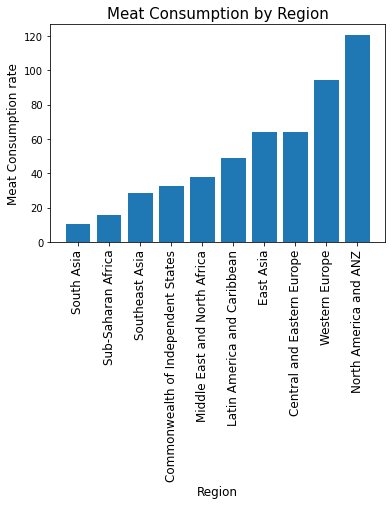

In [108]:
#plot regions vs meat
plt.bar(region_list, region_meat)
plt.xticks(rotation=90, fontsize=12)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Meat Consumption rate", fontsize=12)
plt.title("Meat Consumption by Region", fontsize=15)

plt.savefig("Output/meat_byregion.png")

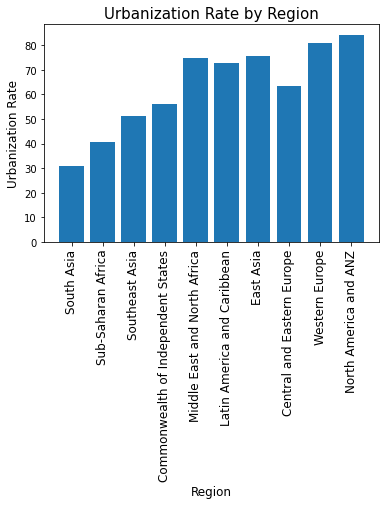

In [109]:
#plot regions vs urbanization
plt.bar(region_list, region_urban)
plt.xticks(rotation=90, fontsize=12)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Urbanization Rate", fontsize=12)
plt.title("Urbanization Rate by Region", fontsize=15)

plt.savefig("Output/urban_byregion.png")

Urbanization by region boxplot

In [110]:
#setting up variables for region boxplots

southasia_df=region_noblanks.loc[region_noblanks['Region']=='South Asia']
SAurban=southasia_df['Urbanization Rate']

CEEuro_df=region_noblanks.loc[region_noblanks['Region']=='Central and Eastern Europe']
CEEurourban=CEEuro_df['Urbanization Rate']

Ind_States_df=region_noblanks.loc[region_noblanks['Region']=='Commonwealth of Independent States']
Ind_Statesurban=Ind_States_df['Urbanization Rate']

EAsia_df=region_noblanks.loc[region_noblanks['Region']=='East Asia']
EAsiaurban=EAsia_df['Urbanization Rate'] 

LatA_C_df=region_noblanks.loc[region_noblanks['Region']=='Latin America and Caribbean']
LatA_Curban=LatA_C_df['Urbanization Rate'] 

MidE_NorA_df=region_noblanks.loc[region_noblanks['Region']=='Middle East and North Africa']
MidE_NorAurban=MidE_NorA_df['Urbanization Rate'] 

NorAme_df=region_noblanks.loc[region_noblanks['Region']=='North America and ANZ']
NorAmeurban=NorAme_df['Urbanization Rate'] 

SouthEastAsia_df=region_noblanks.loc[region_noblanks['Region']=='Southeast Asia']
SouthEastAsiaurban=SouthEastAsia_df['Urbanization Rate'] 

SSAfrica_df=region_noblanks.loc[region_noblanks['Region']=='Sub-Saharan Africa']
SSAfricaurban=SSAfrica_df['Urbanization Rate']

WEuro_df=region_noblanks.loc[region_noblanks['Region']=='Western Europe']
WEurourban=WEuro_df['Urbanization Rate']

Regions = ['South Asia','Central and Eastern Europe','Commonwealth of Independent States',
           'East Asia', 'Latin America/Caribbean',
           'Middle East and North Africa','North America ANZ',
           'Southeast Asia','Sub-Saharan Africa','Western Europe']

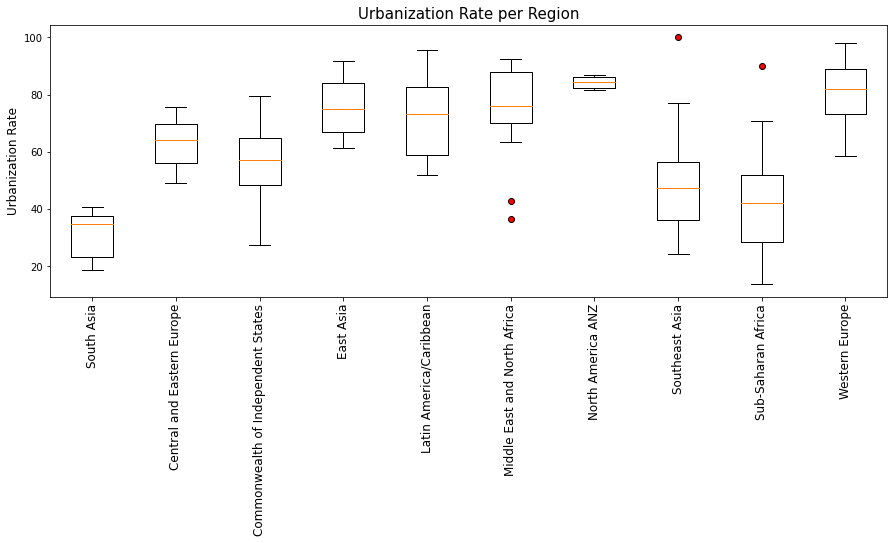

<Figure size 432x288 with 0 Axes>

In [111]:
#boxplot of urbanization by region
plt.figure(figsize=(15,5))
plt.boxplot([SAurban,CEEurourban,Ind_Statesurban,EAsiaurban,LatA_Curban,
             MidE_NorAurban,NorAmeurban,SouthEastAsiaurban,
             SSAfricaurban,WEurourban], labels=Regions, flierprops=dict(markerfacecolor="red"))

plt.title('Urbanization Rate per Region', fontsize=15)
plt.xticks([1,2,3,4,5,6,7,8,9,10],Regions,fontsize=12, rotation= 90)
plt.ylabel('Urbanization Rate', fontsize=12)

plt.show()
plt.savefig("Output/urbanization_avg_box.png")

# Meat Consumption Vs Fertility 

In [112]:
MsvF_df=noblanksmeat_df [['Region','Country','Meat Consumption','Fertility']]
cleanMvsF_df=MsvF_df.dropna()

In [113]:
cleanMvsF_df

,Region,Country,Meat Consumption,Fertility
0,South Asia,Afghanistan,17.3,4.5
2,Middle East and North Africa,Algeria,18.3,3.0
8,Latin America and Caribbean,Argentina,79.7,2.3
9,Commonwealth of Independent States,Armenia,27.7,1.8
11,North America and ANZ,Australia,108.2,1.7
...,...,...,...,...
216,Latin America and Caribbean,Venezuela,56.6,2.3
217,Southeast Asia,Vietnam,28.6,2.0
221,Middle East and North Africa,Yemen,14.7,3.8
222,Sub-Saharan Africa,Zambia,11.9,4.6


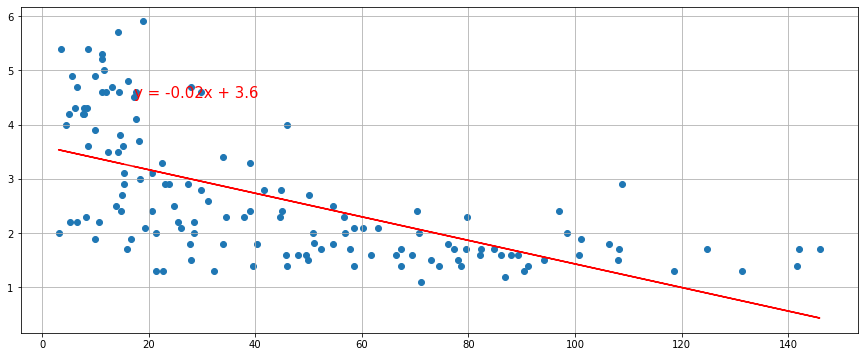

In [114]:
#scatter plot and regrestion
x_valuesFM=cleanMvsF_df['Meat Consumption']
y_valuesFM=cleanMvsF_df['Fertility']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_valuesFM, y_valuesFM)
line_eq="y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

regress_valuesFM = x_valuesFM * slope + intercept
plt.figure(figsize=[15,6])
plt.scatter(x_valuesFM,y_valuesFM)  
plt.annotate(line_eq,(17.3,4.5),fontsize=15,color="red")
plt.plot(x_valuesFM,regress_valuesFM ,c='red')
plt.grid()
plt.savefig('Meat_Fertility.png')
plt.show()

In [115]:
#group by region 
grpbyreg=cleanMvsF_df.groupby("Region").mean()
grpbyreg
grpfer= grpbyreg['Fertility']
grpmeat= grpbyreg['Meat Consumption']

In [116]:
#creating variables for boxplot 
southasia_df=cleanMvsF_df.loc[cleanMvsF_df['Region']=='South Asia']
SAfertility=southasia_df['Fertility']

CEEuro_df=cleanMvsF_df.loc[cleanMvsF_df['Region']=='Central and Eastern Europe']
CEEurofertility=CEEuro_df['Fertility']

Ind_States_df=cleanMvsF_df.loc[cleanMvsF_df['Region']=='Commonwealth of Independent States']
Ind_Statesfertility=Ind_States_df['Fertility']

EAsia_df=cleanMvsF_df.loc[cleanMvsF_df['Region']=='East Asia']
EAsiafertility=EAsia_df['Fertility'] 

LatA_C_df=cleanMvsF_df.loc[cleanMvsF_df['Region']=='Latin America and Caribbean']
LatA_Cfertility=LatA_C_df['Fertility'] 

MidE_NorA_df=cleanMvsF_df.loc[cleanMvsF_df['Region']=='Middle East and North Africa']
MidE_NorAfertility=MidE_NorA_df['Fertility'] 

NorAme_df=cleanMvsF_df.loc[cleanMvsF_df['Region']=='North America and ANZ']
NorAmefertility=NorAme_df['Fertility'] 

SouthEastAsia_df=cleanMvsF_df.loc[cleanMvsF_df['Region']=='Southeast Asia']
SouthEastAsiafertility=SouthEastAsia_df['Fertility'] 

SSAfrica_df=cleanMvsF_df.loc[cleanMvsF_df['Region']=='Sub-Saharan Africa']
SSAfricafertility=SSAfrica_df['Fertility']

WEuro_df=cleanMvsF_df.loc[cleanMvsF_df['Region']=='Western Europe']
WEurofertility=WEuro_df['Fertility']

Regions = ['South Asia','Central and Eastern Europe','Commonwealth of Independent States',
           'East Asia', 'Latin America/Caribbean',
           'Middle East and North Africa','North America ANZ',
           'Southeast Asia','Sub-Saharan Africa','Western Europe']

In [117]:
cleanMvsF_df.dtypes

Region               object
Country              object
Meat Consumption    float64
Fertility           float64
dtype: object

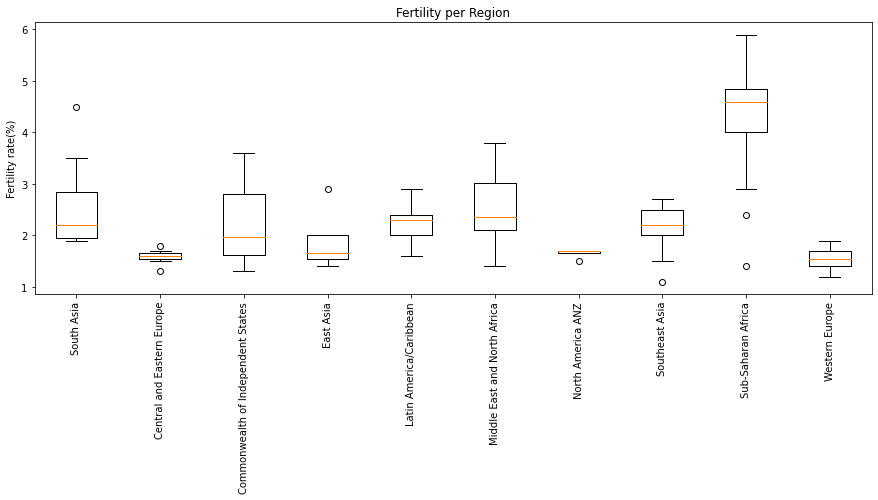

In [118]:
#boxplot of fertiliy per region
plt.figure(figsize=(15,5))
plt.boxplot([SAfertility,CEEurofertility,Ind_Statesfertility,EAsiafertility,LatA_Cfertility,
             MidE_NorAfertility,NorAmefertility,SouthEastAsiafertility,
             SSAfricafertility,WEurofertility], labels=Regions)
plt.title('Fertility per Region')
plt.xticks([1,2,3,4,5,6,7,8,9,10],Regions,fontsize=10, rotation= 90)
plt.ylabel('Fertility rate(%)', fontsize=10)

plt.show()

In [119]:
avgMC_region=grpbyreg['Meat Consumption']
avgF_region=grpbyreg['Fertility']
regionsgrp=grpbyreg.index

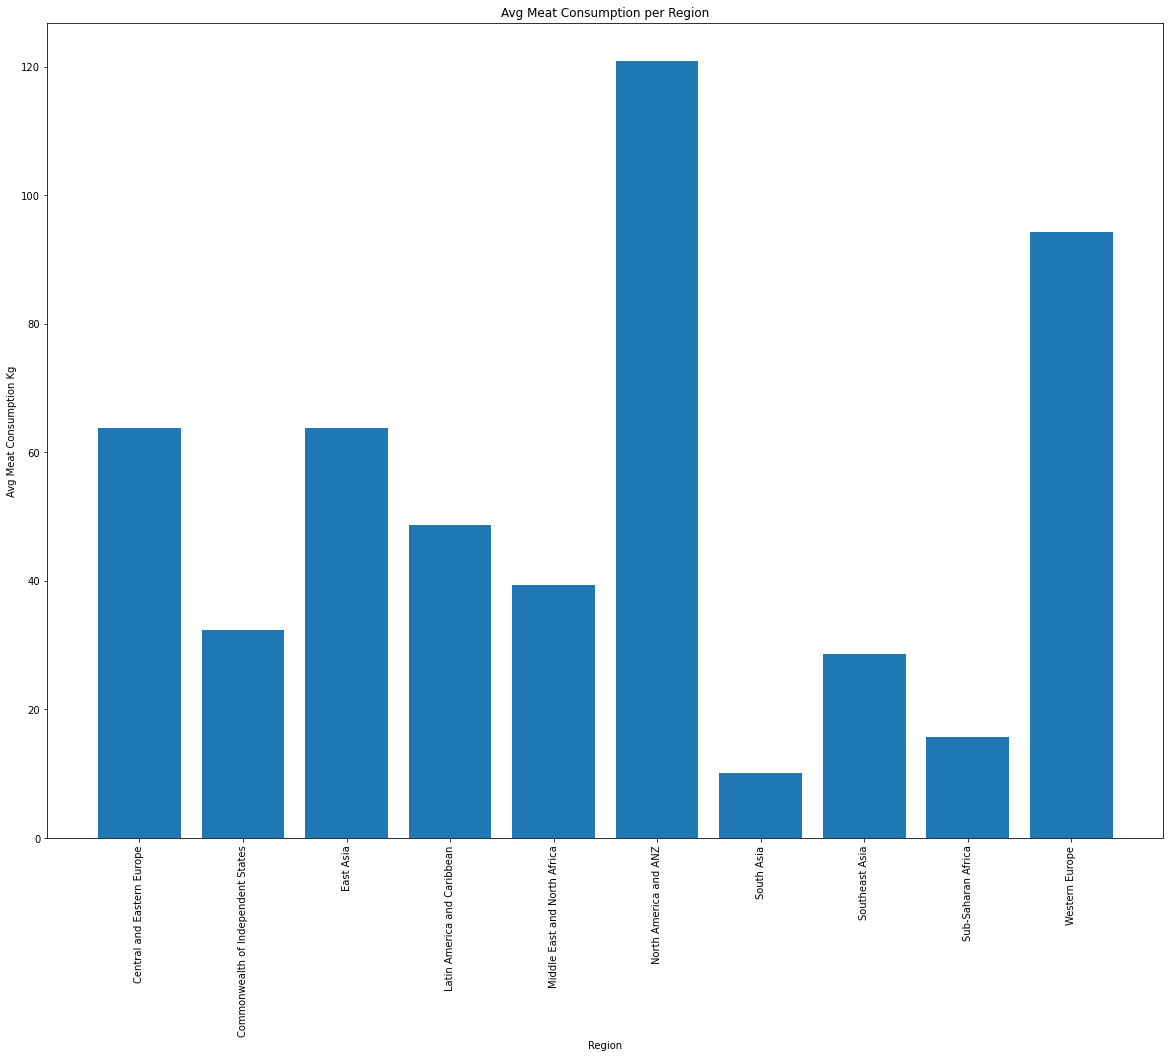

In [120]:
plt.figure(figsize=(20,15))
plt.bar(regionsgrp,avgMC_region)
plt.xticks(fontsize=10, rotation=90)
plt.title('Avg Meat Consumption per Region')
plt.xlabel('Region')
plt.ylabel('Avg Meat Consumption Kg')
plt.savefig('Output/Avg Meat Consumption per Region.png')

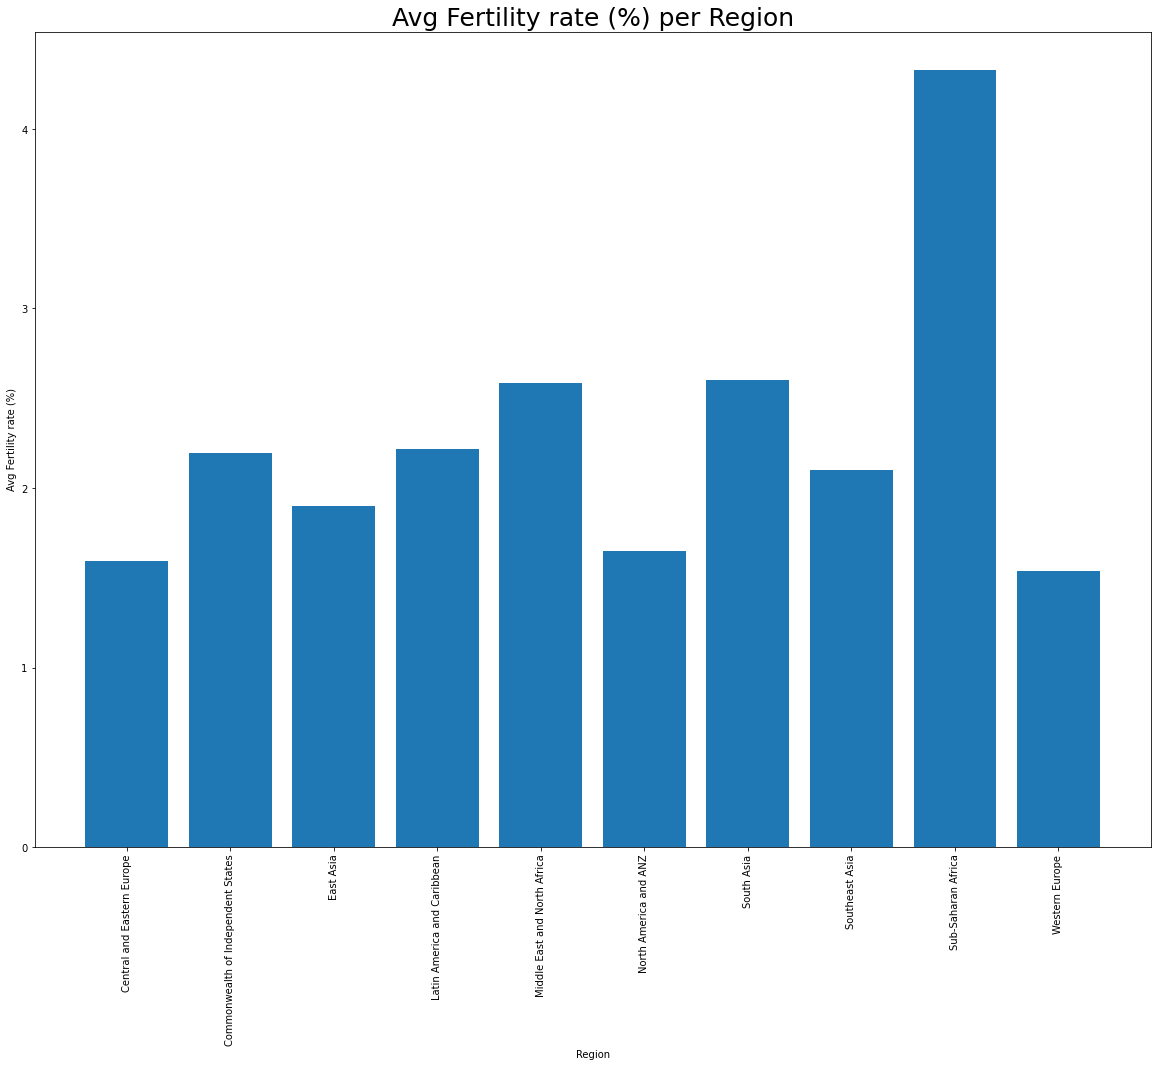

In [121]:
plt.figure(figsize=(20,15))
plt.bar(regionsgrp,avgF_region)
plt.xticks(fontsize=10, rotation=90)
plt.title('Avg Fertility rate (%) per Region', fontsize=25)
plt.xlabel('Region')
plt.ylabel('Avg Fertility rate (%)')
plt.savefig('Output/Avg Fertility rate (%) per Region.png')

In [122]:
_data_df = noblanksmeat_df[["Country", "Region", "Meat Consumption", "Urbanization Rate"]]
blank_urban = urban_data_df.loc[urban_data_df["Urbanization Rate"].isna()]
blank_urban_list = list(blank_urban["Country"])
print(f'The following {len(blank_urban_list)} countires were removed from analysis for lack of data on Urbanization rate {blank_urban_list}')

#drop urbanization rate values that are nan
urban_data_df_nona = urban_data_df.dropna(subset=["Urbanization Rate"])

The following 4 countires were removed from analysis for lack of data on Urbanization rate ['Kuwait', 'Samoa', 'Sao Tome and Principe', 'Virgin Islands']


The following 11 countires were removed from analysis for lack of data on Life Expect ['American Samoa', 'Dominica', 'French Polynesia', 'Guam', 'North Korea', 'South Korea', 'Maldives', 'New Caledonia', 'Qatar', 'Switzerland', 'Virgin Islands']


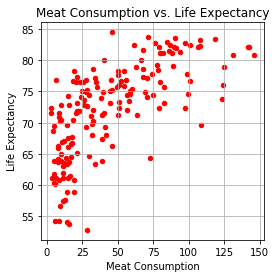

In [123]:
#Meat consumption vs Life Expectancy
lifeexpect_df = noblanksmeat_df.loc[:, ["Country", "Life Expectancy", "Meat Consumption",'Region']]
lifeexpect_df.head()
lifeexpect_blank = lifeexpect_df.loc[lifeexpect_df["Life Expectancy"].isna()]
blank_lifeexpect = list(lifeexpect_blank["Country"])
print(f'The following {len(blank_lifeexpect)} countires were removed from analysis for lack of data on Life Expect {blank_lifeexpect}')

avg_lifex =  pd.DataFrame(lifeexpect_df.groupby(["Country", "Life Expectancy"])["Meat Consumption"].mean()).reset_index()



avg_lifex.plot(kind="scatter", x="Meat Consumption", y="Life Expectancy", grid=True, color='red', figsize=(4,4),
              title="Meat Consumption vs. Life Expectancy")
plt.show()

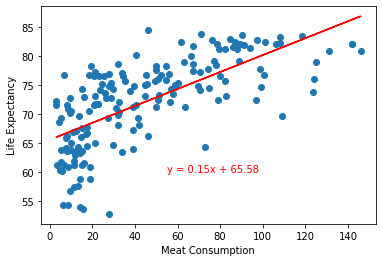

In [124]:
x_valuesLX = avg_lifex['Meat Consumption']
y_valuesLX = avg_lifex['Life Expectancy']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_valuesLX, y_valuesLX)
regress_values1 = x_valuesLX * slope + intercept
line_eq1 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_valuesLX, y_valuesLX)
plt.plot(x_valuesLX,regress_values1,"r-")
plt.annotate(line_eq1,(55,60),color="red")
plt.xlabel('Meat Consumption')
plt.ylabel('Life Expectancy')
plt.show()

In [125]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
lifex_data = avg_lifex["Life Expectancy"]
quartiles = lifex_data.quantile([.25,.5,.75])
lower_quartile = quartiles[0.25]
upper_quartile = quartiles[0.75]
iqr = upper_quartile-lower_quartile
print(f"The lower quartile of life expectancy: {lower_quartile}")
print(f"The upper quartile of life expectancy: {upper_quartile}")
print(f"The interquartile range of life expectancy: {iqr}")
print(f"The median life expectancy is: {quartiles[0.5]}")

# Determine outliers using upper and lower bounds
lower_bound = lower_quartile - (1.5*iqr)
upper_bound = upper_quartile + (1.5*iqr)
outliers = lifex_data.loc[(lifex_data < lower_bound) | (lifex_data > upper_bound)]

print(f"The potential outliers for life expectancy are below {lower_bound} and above {upper_bound} years of age.")

The lower quartile of life expectancy: 66.80000000000001
The upper quartile of life expectancy: 77.25
The interquartile range of life expectancy: 10.449999999999989
The median life expectancy is: 73.2
The potential outliers for life expectancy are below 51.12500000000003 and above 92.92499999999998 years of age.


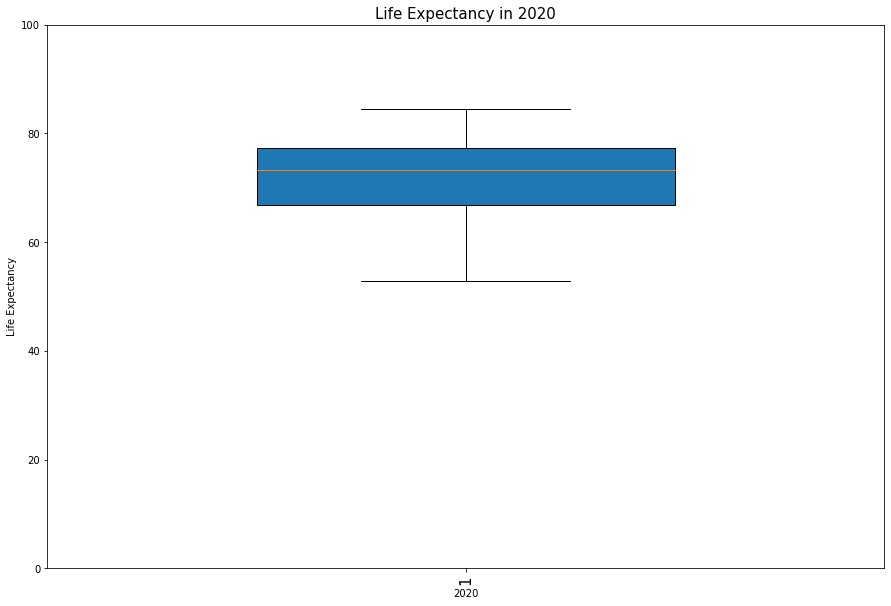

In [126]:
plt.subplots(figsize=(15, 10))
plt.title('Life Expectancy in 2020',fontsize =15)
plt.ylabel('Life Expectancy',fontsize = 10)
plt.xlabel('2020',fontsize = 10)
plt.xticks(rotation='vertical',fontsize = 15)
plt.yticks(fontsize = 10)
plt.boxplot(lifex_data, widths = 0.5, patch_artist=True,vert=True)

plt.ylim(0, 100)

plt.show()

In [127]:
lifex_data

0      64.5
1      76.7
2      60.8
3      76.9
4      76.5
       ... 
166    72.1
167    75.3
168    66.1
169    63.5
170    61.2
Name: Life Expectancy, Length: 171, dtype: float64

In [128]:
region_lifeexpect_df =noblanksmeat_df.loc[:, ["Region", "Country", "Life Expectancy", "Meat Consumption"]]
region_lifeexpect_df.head()

,Region,Country,Life Expectancy,Meat Consumption
0,South Asia,Afghanistan,64.5,17.3
2,Middle East and North Africa,Algeria,76.7,18.3
3,NaN,American Samoa,NaN,24.9
5,NaN,Angola,60.8,19.0
7,NaN,Antigua and Barbuda,76.9,56.0


In [129]:
CEEuro_df = region_lifeexpect_df.loc[region_lifeexpect_df["Region"] == "Central and Eastern Europe",:]
Ind_States_df = region_lifeexpect_df.loc[region_lifeexpect_df["Region"] == "Commonwealth of Independent States",:]
EAsia_df = region_lifeexpect_df.loc[region_lifeexpect_df["Region"] == "East Asia",:]
LatA_C_df = region_lifeexpect_df.loc[region_lifeexpect_df["Region"] == "Latin America and Caribbean",:]
MidE_NorA_df = region_lifeexpect_df.loc[region_lifeexpect_df["Region"] == "Middle East and North Africa",:]
NorAme_df = region_lifeexpect_df.loc[region_lifeexpect_df["Region"] == "North America and ANZ",:]
SouthAsia_df = region_lifeexpect_df.loc[region_lifeexpect_df["Region"] == "South Asia",:]
SouthEastAsia_df = region_lifeexpect_df.loc[region_lifeexpect_df["Region"] == "Southeast Asia",:]
SSAfrica_df = region_lifeexpect_df.loc[region_lifeexpect_df["Region"] == "Sub-Saharan Africa",:]
WEuro_df = region_lifeexpect_df.loc[region_lifeexpect_df["Region"] == "Western Europe",:]

CEEuro = CEEuro_df["Meat Consumption"]

Ind_States = Ind_States_df["Meat Consumption"]

EAsia = EAsia_df["Meat Consumption"]

LatA_C = LatA_C_df["Meat Consumption"]

MidE_NorA = MidE_NorA_df["Meat Consumption"]

NorAme = NorAme_df["Meat Consumption"]

SouthAsia = SouthAsia_df["Meat Consumption"]

SouthEastAsia = SouthEastAsia_df["Meat Consumption"]

SSAfrica = SSAfrica_df["Meat Consumption"]

WEuro = WEuro_df["Meat Consumption"]



Regions = ["Central and Eastern Europe","Commonwealth of Independent States","East Asia","Latin America and Caribbean","Middle East and North Africa","North America and ANZ","South Asia","Southeast Asia","Sub-Saharan Africa","Western Europe"]

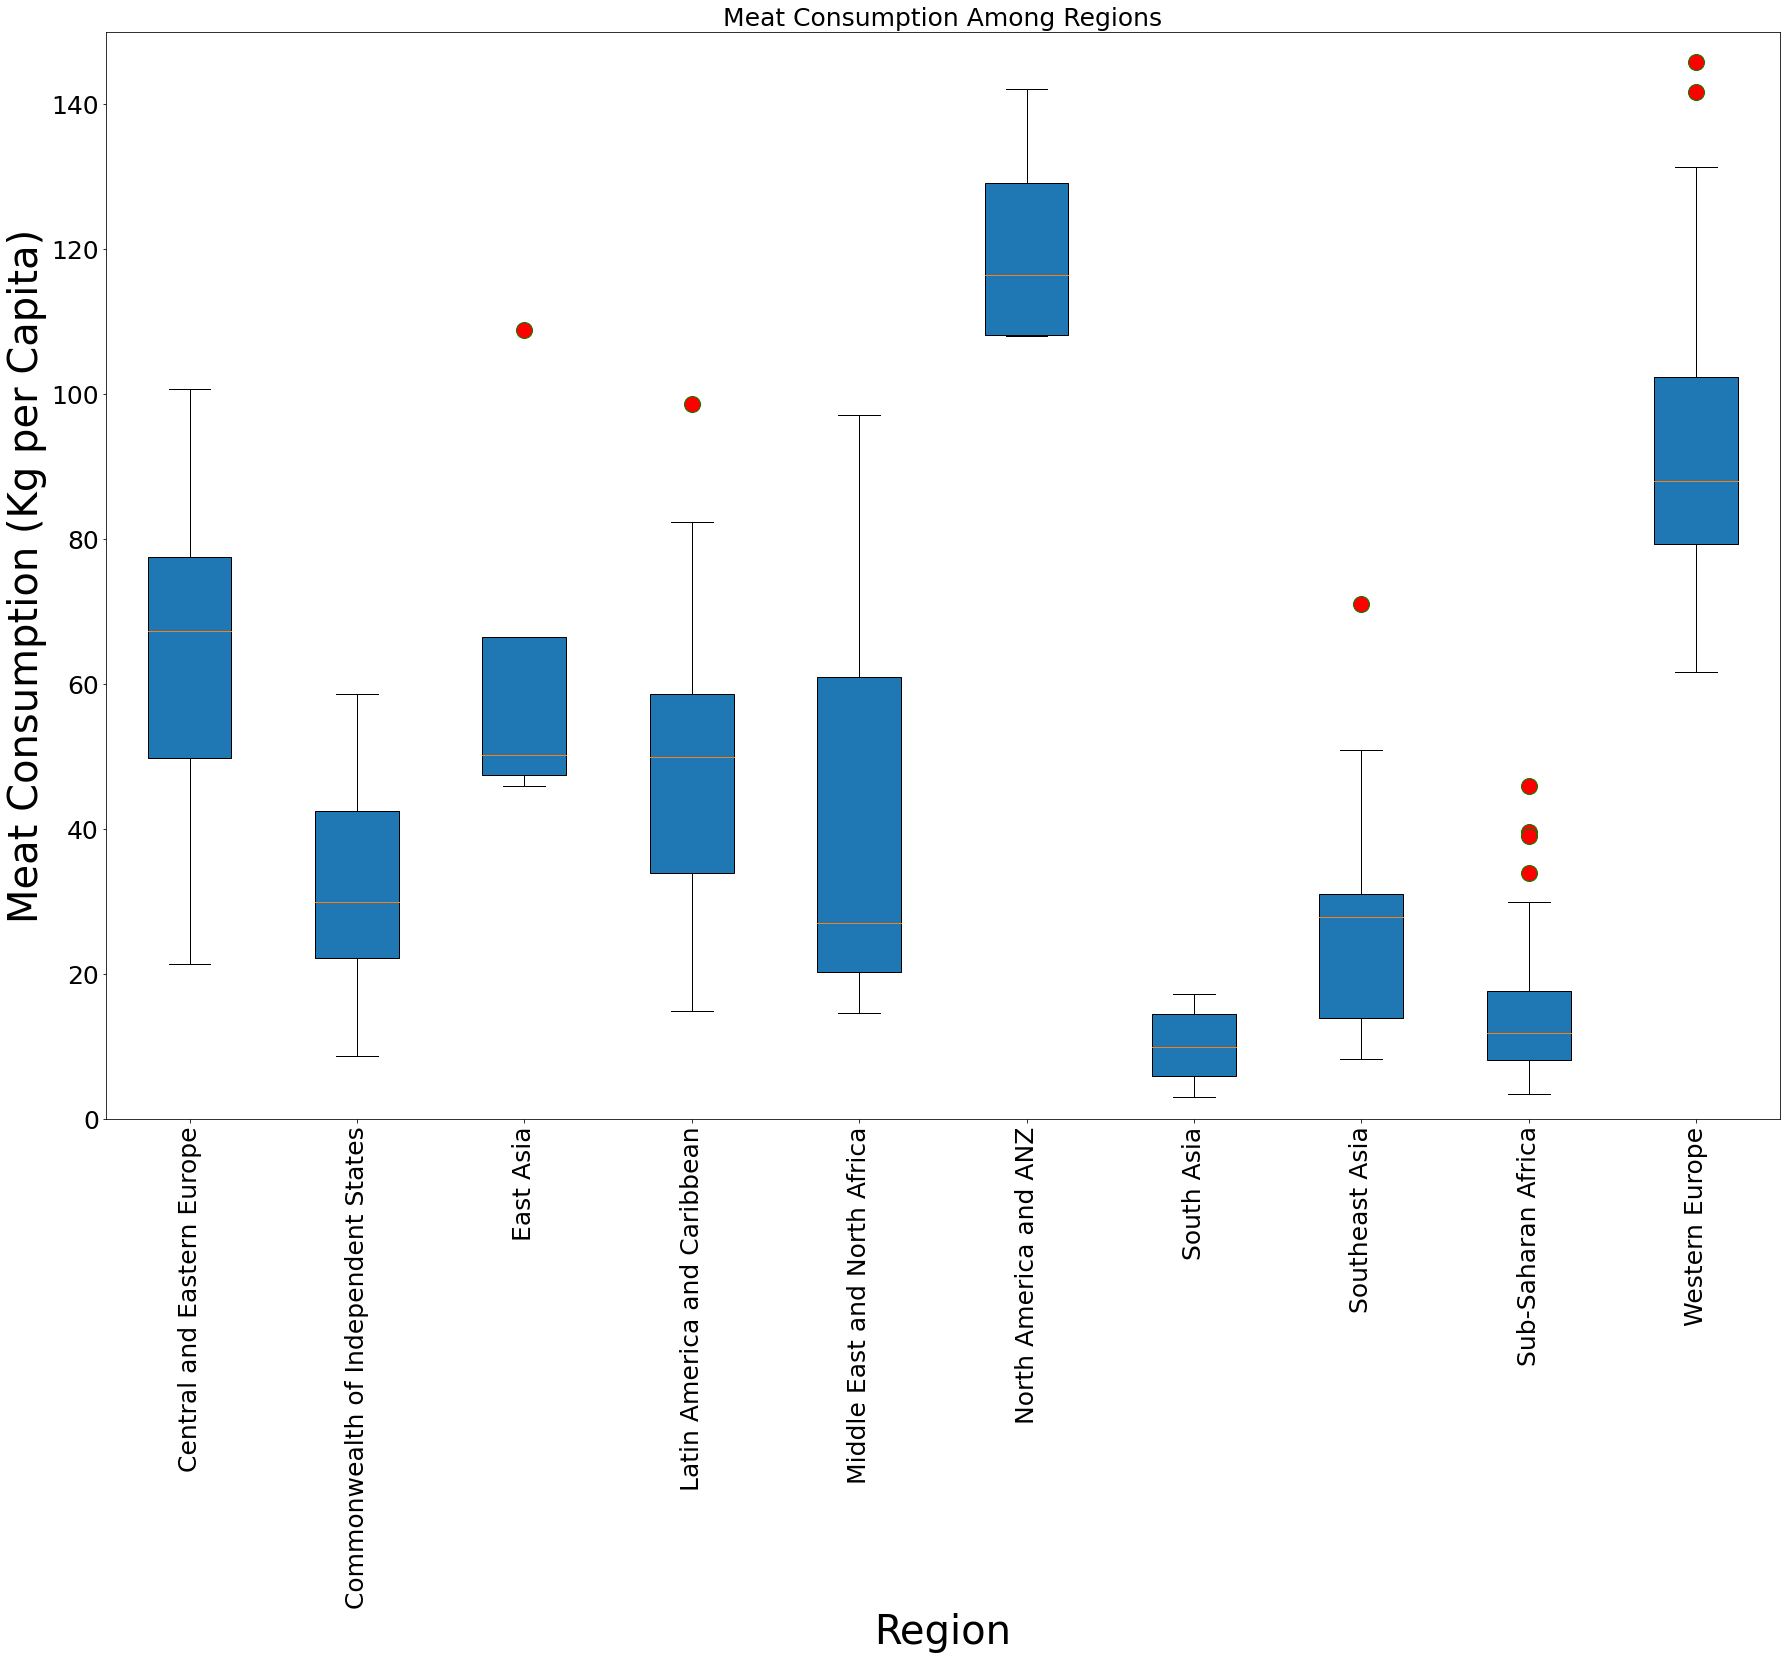

In [130]:
flierprops = dict(marker='o', markerfacecolor='r', markersize=16,
                  linestyle='none', markeredgecolor='g')
data = [CEEuro,Ind_States,EAsia,LatA_C,MidE_NorA,NorAme,SouthAsia,SouthEastAsia,SSAfrica,WEuro]
plt.subplots(figsize=(30, 20))
plt.title('Meat Consumption Among Regions',fontsize =25)
plt.ylabel('Meat Consumption (Kg per Capita)',fontsize = 40)
plt.xlabel('Region',fontsize = 40)
plt.xticks(rotation='vertical',fontsize = 25)
plt.yticks(fontsize = 25)
plt.boxplot(data, labels=Regions, widths = 0.5, patch_artist=True,vert=True,flierprops=flierprops)

plt.ylim(0, 150)

plt.show()


In [131]:
reg_lifex_mean = region_lifeexpect_df.groupby('Region')['Life Expectancy'].mean()
reg_lifex_mean
reg_mc_mean = region_lifeexpect_df.groupby('Region')['Meat Consumption'].mean()
reg_mc_mean
lifex_mc_summary = pd.DataFrame({'Average Meat Consumption':reg_mc_mean,
                           'Average Life Expectancy':reg_lifex_mean})
lifex_mc_summary

,Average Meat Consumption,Average Life Expectancy
Region,,
Central and Eastern Europe,64.108333,77.408333
Commonwealth of Independent States,32.425000,72.266667
East Asia,63.775000,76.966667
Latin America and Caribbean,48.733333,74.914286
Middle East and North Africa,39.418750,75.443750
North America and ANZ,120.800000,81.650000
South Asia,10.157143,70.100000
Southeast Asia,28.611111,73.200000
Sub-Saharan Africa,15.711429,62.088571


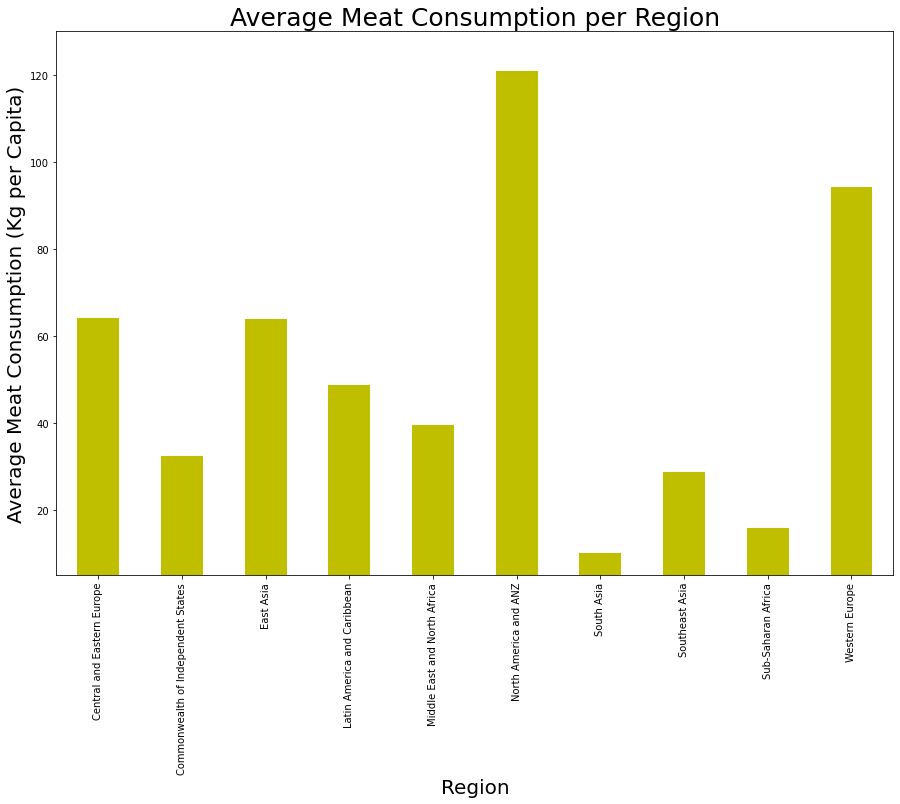

In [132]:
pd_plot = reg_mc_mean.plot.bar(figsize=(15,10),color = 'y')
plt.title("Average Meat Consumption per Region",fontsize=25)
plt.xlabel("Region",fontsize=20)
plt.ylabel("Average Meat Consumption (Kg per Capita)",fontsize=20)
plt.ylim(5, 130)
plt.show()

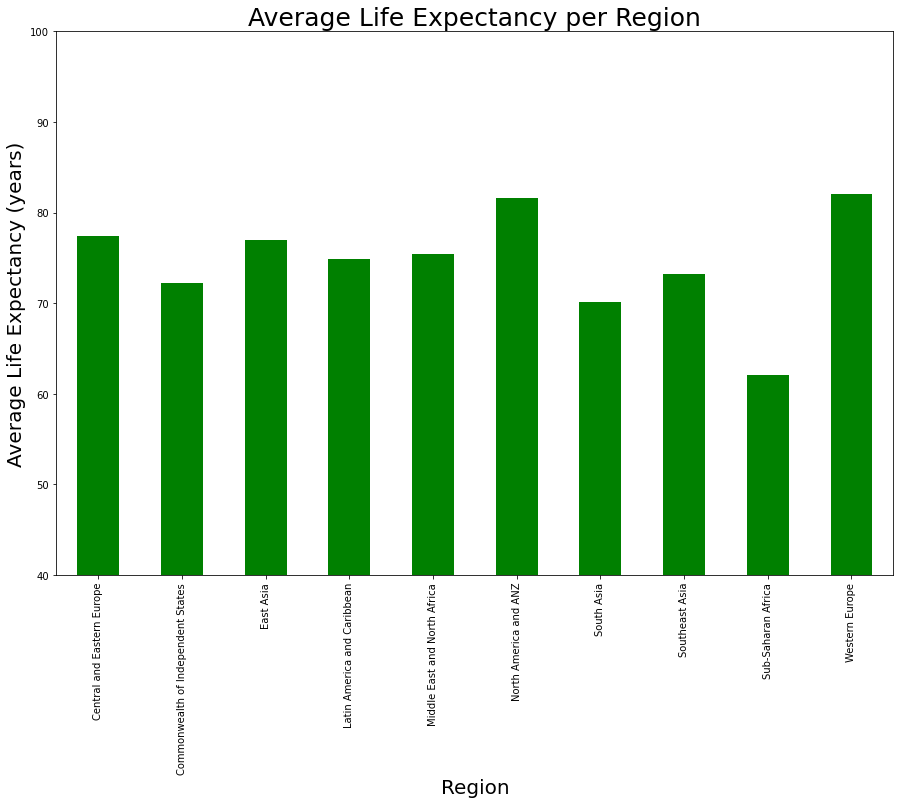

In [133]:
pd_plot = reg_lifex_mean.plot.bar(figsize=(15,10),color = 'g')
plt.title("Average Life Expectancy per Region",fontsize=25)
plt.xlabel("Region",fontsize=20)
plt.ylabel("Average Life Expectancy (years)",fontsize=20)
plt.ylim(40, 100)
plt.show()


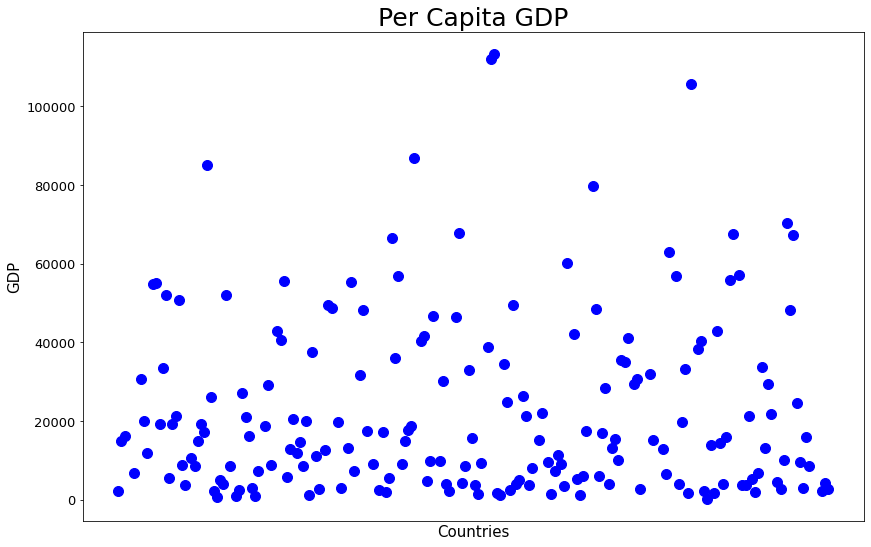

In [134]:
countries = merged_df["Country"]
gdp       = merged_df["GDP Per Capita"]

fig, ax1 = plt.subplots(figsize=(14, 9))
plt.scatter(countries, gdp, s=100, color="blue")

plt.title('Per Capita GDP', fontsize = 25)
plt.xlabel('Countries',fontsize = 15)
plt.ylabel('GDP', fontsize = 15)
plt.yticks(fontsize=13)
ax1.axes.xaxis.set_ticks([])
plt.show()

The correlation coefficient is: 0.5107157534009338
The line of best fit is: y = 437.47x + 1794.87


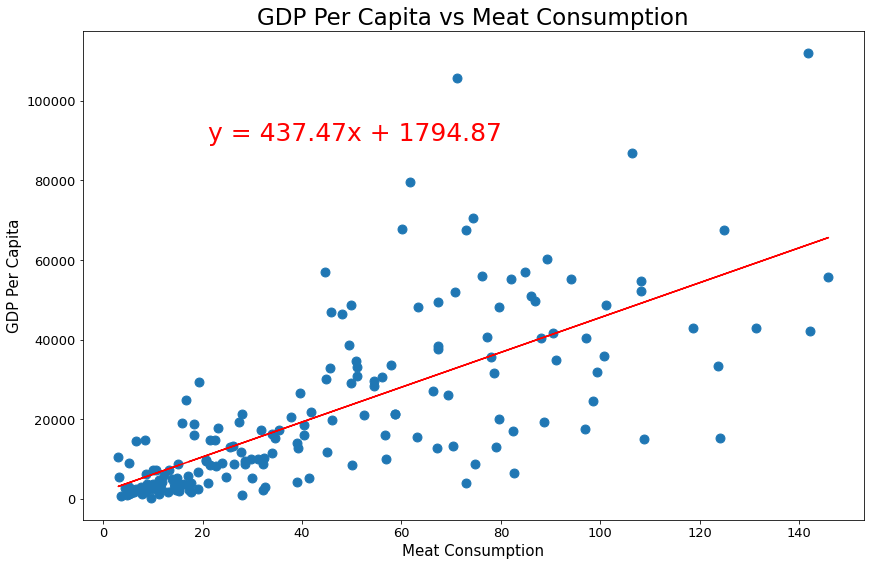

In [135]:
meat_gdp_df = pd.merge(meat_df,gdp_df,  how="inner", on=["ISO-code"])
meat_gdp_df.dropna(inplace=True)
meat_gdp_df.drop(columns="Country_y",axis=1,inplace=True)
meat_gdp_df.rename(columns={"Country_x":"Country"},inplace=True)
#meat_gdp_df

meat_consumption = meat_gdp_df["Meat Consumption"]
gdp_per_capita   = meat_gdp_df["GDP Per Capita"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(meat_consumption, gdp_per_capita)

regress_values = meat_consumption * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The correlation coefficient is: {rvalue**2}",
      f"The line of best fit is: {line_eq}"
      ,sep="\n")

fig1, ax1 = plt.subplots(figsize=(14, 9))
plt.scatter(meat_consumption, gdp_per_capita, s=80)
plt.plot(meat_consumption, regress_values,"r-")
plt.annotate(line_eq, (21, 90000), fontsize=25, color="red")
plt.title('GDP Per Capita vs Meat Consumption',fontsize = 23)
plt.xlabel('Meat Consumption',  fontsize = 15)
plt.ylabel('GDP Per Capita',fontsize = 15)

plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.show()

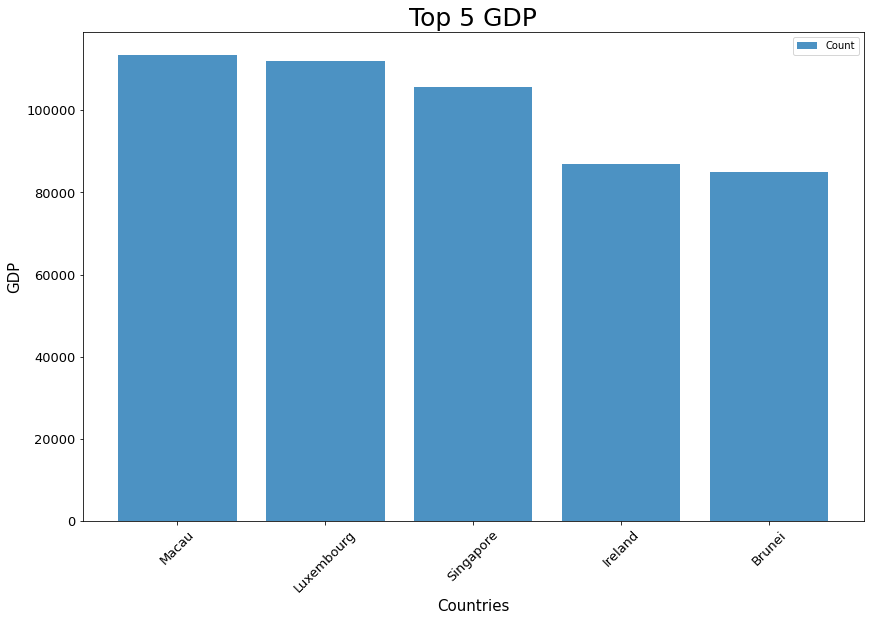

In [136]:
top_5_gdp_countries = merged_df[["Country","GDP Per Capita"]].sort_values("GDP Per Capita", axis=0, ascending=False).head(5)
top_5_gdp_countries.index.name = 'ID'
merged_df.index.name = 'ID'

countries = list(top_5_gdp_countries["Country"])
gdp       = list(top_5_gdp_countries["GDP Per Capita"])

plt.subplots(figsize=(14, 9))
plt.bar(countries,gdp, align='center',alpha=.8, label='Count',width=0.8)

plt.title('Top 5 GDP', fontsize = 25)
plt.xlabel('Countries',fontsize = 15)
plt.ylabel('GDP', fontsize = 15)
plt.xticks(fontsize=13, rotation=45)

plt.legend()

plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.show()

In [137]:
gdp_data_df = merged_df["GDP Per Capita"]
quartiles = gdp_data_df.quantile([.25,.5,.75])
lower_quartile = quartiles[0.25]
upper_quartile = quartiles[0.75]
iqr = upper_quartile-lower_quartile
print(f"The lower quartile of gdp: {lower_quartile}")
print(f"The upper quartile of gdp: {upper_quartile}")
print(f"The interquartile range of gdp: {iqr}")
print(f"The median life gdp is: {quartiles[0.5]}")

# Determine outliers using upper and lower bounds
lower_bound = lower_quartile - (1.5*iqr)
upper_bound = upper_quartile + (1.5*iqr)
outliers = gdp_data_df.loc[(gdp_data_df < lower_bound) | (gdp_data_df > upper_bound)]

print(f"The potential outliers for per-capita GDP are below {lower_bound} and above {upper_bound}.")

The lower quartile of gdp: 5303.0
The upper quartile of gdp: 33642.75
The interquartile range of gdp: 28339.75
The median life gdp is: 14991.5
The potential outliers for per-capita GDP are below -37206.625 and above 76152.375.


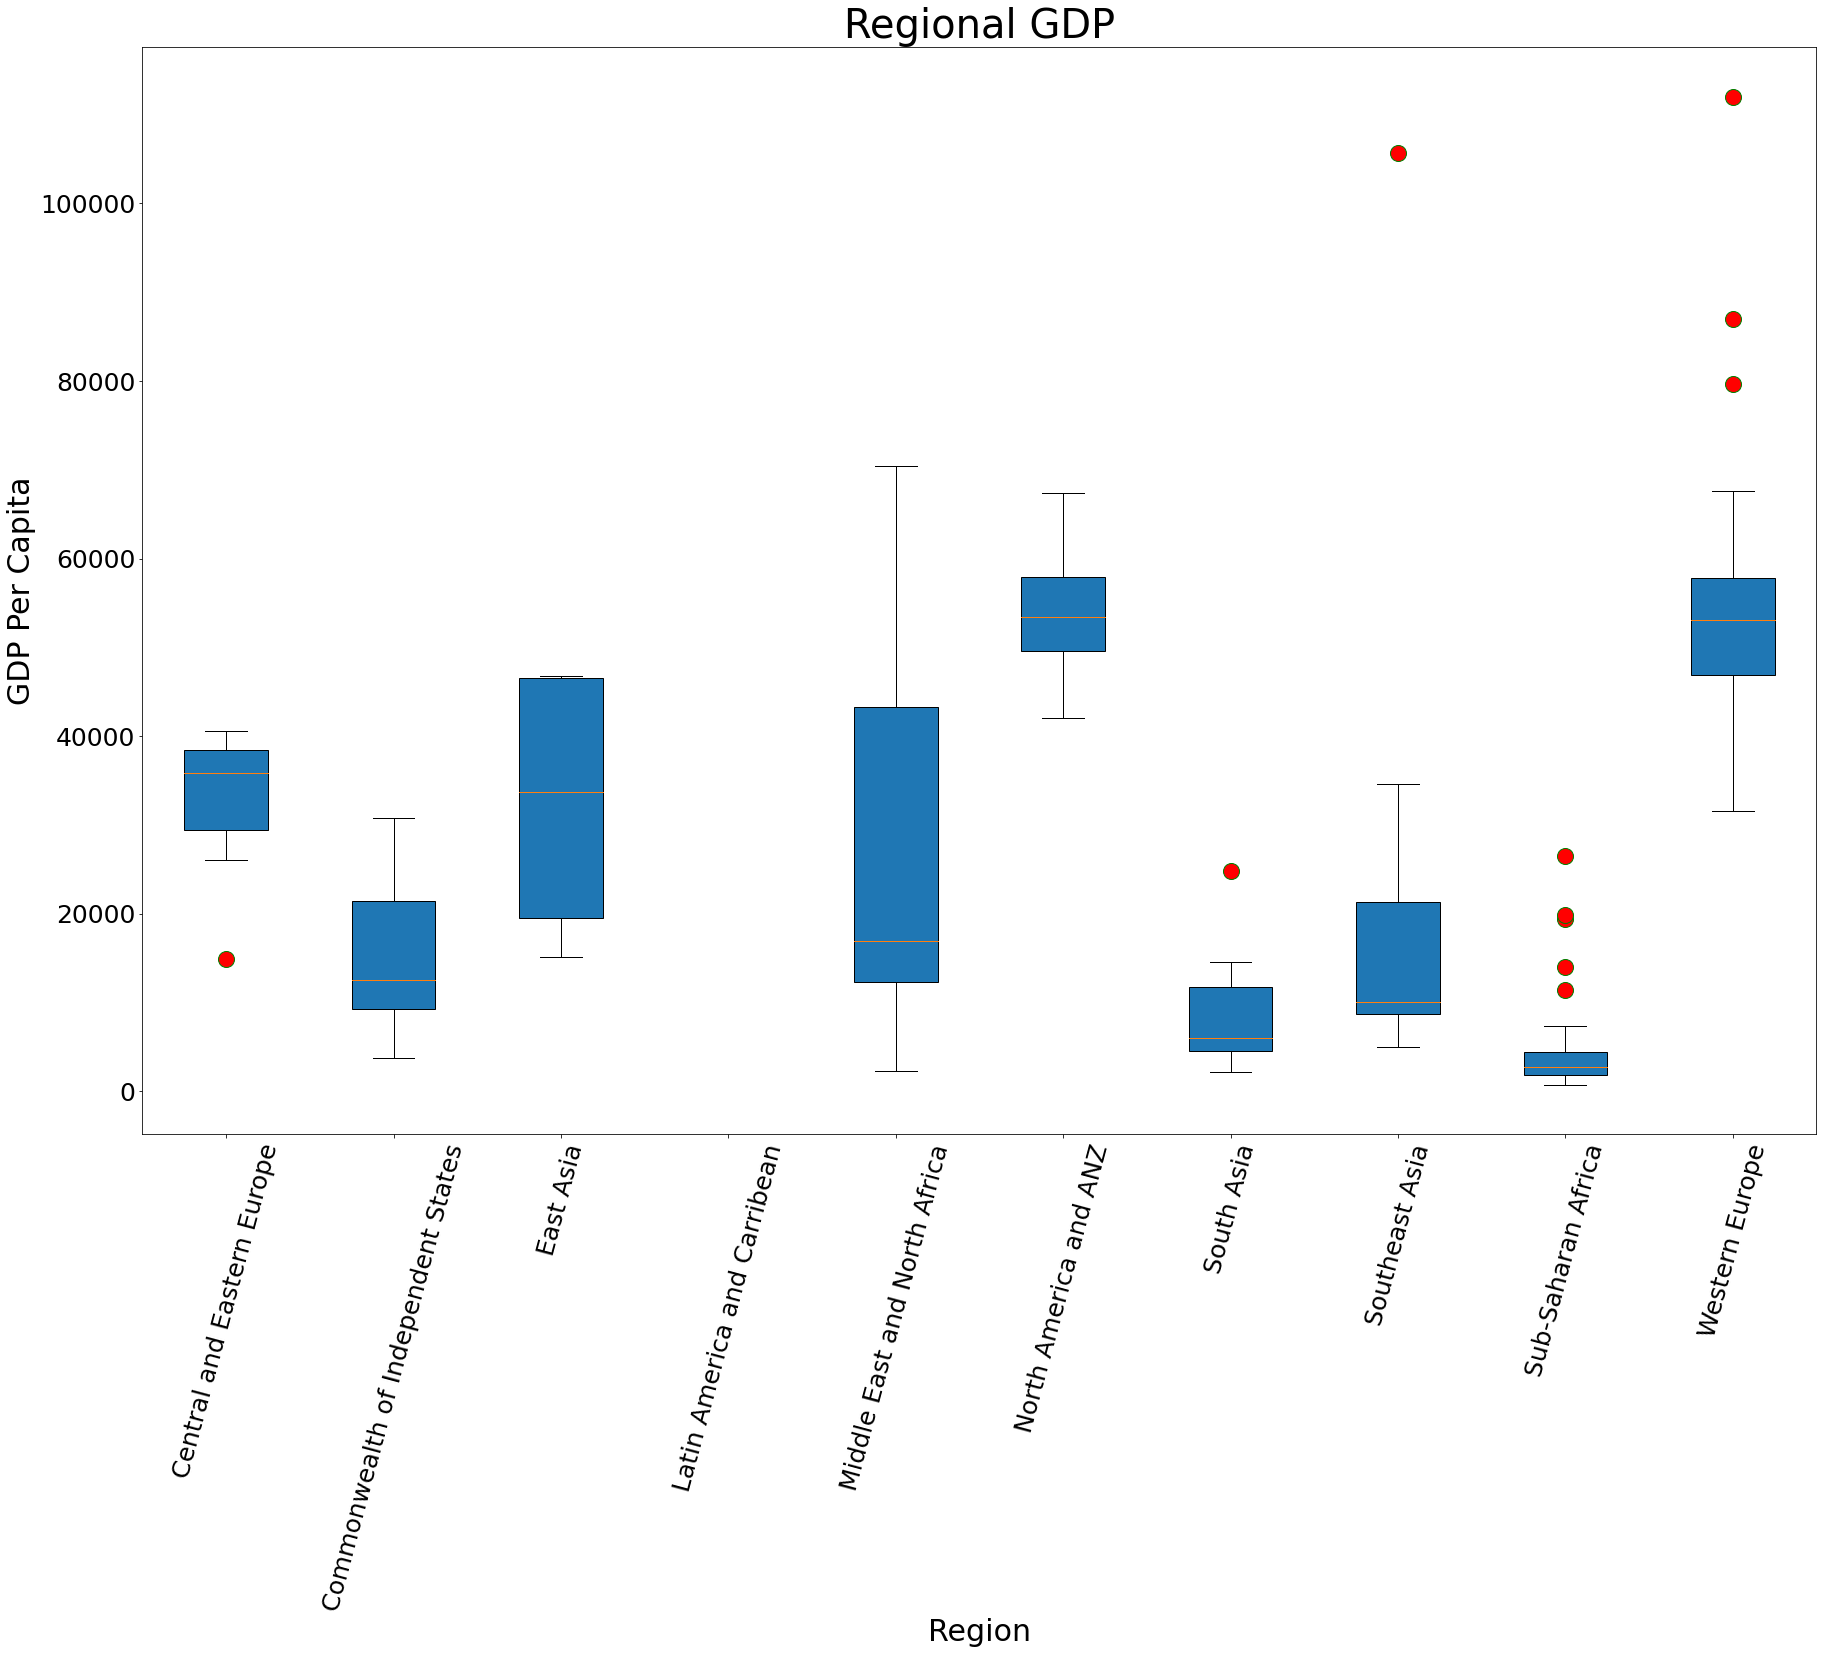

In [138]:
gdp_by_region_df = merged_df[["Region", "Country", "GDP Per Capita", "Meat Consumption"]]
gdp_by_region_df = gdp_by_region_df.dropna()

CEEuro_df = gdp_by_region_df.loc[gdp_by_region_df["Region"] == "Central and Eastern Europe",:]
Ind_States_df = gdp_by_region_df.loc[gdp_by_region_df["Region"] == "Commonwealth of Independent States",:]
EAsia_df = gdp_by_region_df.loc[gdp_by_region_df["Region"] == "East Asia",:]
LatA_C_df = gdp_by_region_df.loc[gdp_by_region_df["Region"] == "Latin America and Carribean",:]
MidE_NorA_df = gdp_by_region_df.loc[gdp_by_region_df["Region"] == "Middle East and North Africa",:]
NorAme_df = gdp_by_region_df.loc[gdp_by_region_df["Region"] == "North America and ANZ",:]
SouthAsia_df = gdp_by_region_df.loc[gdp_by_region_df["Region"] == "South Asia",:]
SouthEastAsia_df = gdp_by_region_df.loc[gdp_by_region_df["Region"] == "Southeast Asia",:]
SSAfrica_df = gdp_by_region_df.loc[gdp_by_region_df["Region"] == "Sub-Saharan Africa",:]
WEuro_df = gdp_by_region_df.loc[gdp_by_region_df["Region"] == "Western Europe",:]

CEEuro_ds = CEEuro_df["GDP Per Capita"]
Ind_States_ds = Ind_States_df["GDP Per Capita"]
EAsia_ds = EAsia_df["GDP Per Capita"]
LatA_C_ds = LatA_C_df["GDP Per Capita"]
MidE_NorA_ds = MidE_NorA_df["GDP Per Capita"]
NorAme_ds = NorAme_df["GDP Per Capita"]
SouthAsia_ds = SouthAsia_df["GDP Per Capita"]
SouthEastAsia_ds = SouthEastAsia_df["GDP Per Capita"]
SSAfrica_ds = SSAfrica_df["GDP Per Capita"]
WEuro_ds = WEuro_df["GDP Per Capita"]

Regions = ["Central and Eastern Europe","Commonwealth of Independent States","East Asia","Latin America and Carribean","Middle East and North Africa","North America and ANZ","South Asia","Southeast Asia","Sub-Saharan Africa","Western Europe"]
                                         
boxProperties = dict(marker='o', markerfacecolor='r', markersize=16, linestyle="none", markeredgecolor="g")

data = [CEEuro_ds,
        Ind_States_ds,
        EAsia_ds,
        LatA_C_ds,
        MidE_NorA_ds,
        NorAme_ds,
        SouthAsia_ds,
        SouthEastAsia_ds,
        SSAfrica_ds,
        WEuro_ds]

plt.subplots(figsize=(30, 20))

plt.title('Regional GDP',fontsize =40)
plt.ylabel('GDP Per Capita',fontsize = 30)
plt.xlabel('Region',fontsize = 30)
plt.xticks(rotation=75,fontsize = 25)
plt.yticks(fontsize = 25)
plt.boxplot(data, labels=Regions, widths = 0.5, patch_artist=True,vert=True,flierprops=boxProperties)
plt.show()    